In [25]:
# Mounting Google Drive
# Adding error handling when running Colab notebook locally
# Adding cell notebook when ran locally on a machine with 32 GB of RAM and i9 Processor
# If running, run as standard Colab file please provide path to file in the try block
try:
    from google.colab import drive
    drive.mount('/content/drive')
    filepathname = ""
except ModuleNotFoundError:
    filepath = 'C:\\Users\\micha\\Documents\\GitHub\\codingdojo\\data-science-assignments\\11 - Deep Learning\\'
    aapl = filepath + 'AAPL.csv'

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [27]:
# Get data
aapl = pd.read_csv(aapl, index_col = 'Date')
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,17.065252,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.849854,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.380503,594333600
2013-01-07,18.642857,18.903572,18.400000,18.710714,16.284145,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761072,16.327978,458707200


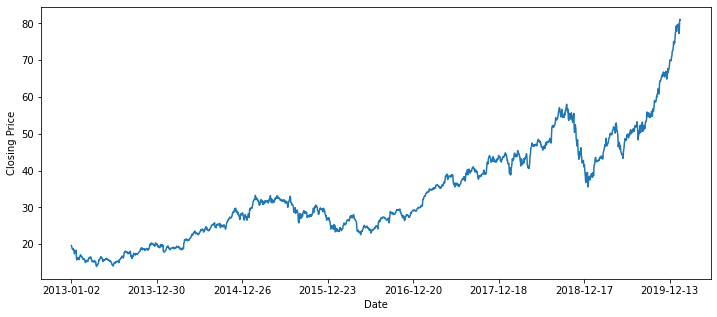

In [28]:
plt.figure(figsize=(12,5))
aapl['Close'].plot()
plt.ylabel('Closing Price');

In [29]:
train.shape

(1762, 1)

In [30]:
# Split data into training and testing - testing is month of January 2020
# We will also only use the closing column
train = aapl.loc['2013-01-02':'2019-12-31',['Close']]
test = aapl.loc['2020-01-01':'2020-01-31',['Close']]

In [31]:
# Scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [32]:
# Reshape data into sequences using TimeseriesGenerator
train_features = TimeseriesGenerator(train, train, length=5)

# Step 1

In [33]:
input_shape = train_features[0][0][0].shape
input_shape 

(5, 1)

In [34]:
model = Sequential()

In [35]:
# LSTM layer
model.add(LSTM(units = 50,
               return_sequences= True, # True if next layer will be a recurrent layer
               input_shape = input_shape))
model.add(LSTM(units = 50,
               return_sequences=True))
model.add(LSTM(units = 50,
               return_sequences=False))

# Output layer
model.add(Dense(units = 1, activation = 'linear'))

# Step 2

In [36]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

#Step 3

In [37]:
history = model.fit(train_features, epochs=100, verbose = 0)

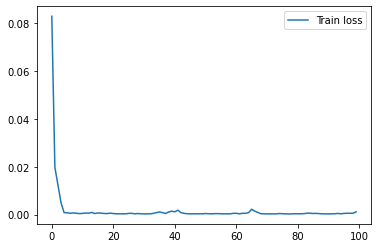

In [38]:
# Visualize the loss
plt.plot(history.history['loss'], label = 'Train loss')
plt.legend();

In [39]:
test_features = TimeseriesGenerator(test, test, length = 5)

In [40]:
preds = model.predict(test_features)

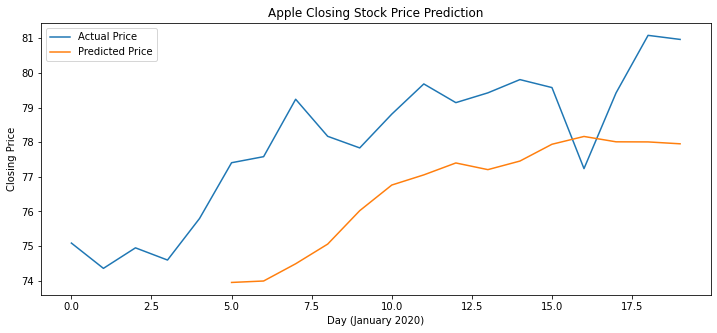

In [41]:
plt.figure(figsize = (12,5))
plt.plot(scaler.inverse_transform(test), label = 'Actual Price')
# Note: there are less prices for the predicted price than the actual price,
# because we need to use 5 days of prices to create our first prediction
plt.plot(range(5, len(test)), scaler.inverse_transform(preds), label='Predicted Price')
plt.title('Apple Closing Stock Price Prediction')
plt.xlabel('Day (January 2020)')
plt.ylabel('Closing Price')
plt.legend();